# Лабораторная работа №5. Метод Монте Карло для решения систем линейных алгебраических уравнений

## Ширяева Ольга, 4 курс, 3 группа

## Вариант 12

In [25]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

%matplotlib inline

# ax = f
a_real = np.array(
    [
     [0.5, 0.2, 0],
     [0.2, 0.8, 0.1],
     [0.8, -0.4, 0.6]
    ]
)

# x = ax + f
f  = np.array([3., -2., 5.])

a = np.array(
    [
     [0.5, -0.2, 0],
     [-0.2, 0.2, -0.1],
     [-0.8, 0.4, 0.4]
    ]
)

In [12]:
def solve(m, N):
    x = []
    n = 3
    # N - length of Markov's chain
    # m - number of Markov's implementations
    
    h = np.zeros((n, n))
    for i in range(n):
            h[i][i] = 1

    # вектор начальных вероятностей
    pi = []

    # матрица переходнах состояний цепи Маркова 
    p = []

    # веса состояний цепи Маркова 
    Q = np.zeros((n, N + 1))    

    # Random
    ksi = np.zeros((n, m))
    aplha = 0

    for i in range(n):
        pi.append(1.0 / n)
        p.append([])
        for j in range(n):
            p[i].append(1.0 / n)

    def prob_intervals(vector): 
        n = len(vector)
        result = []
        sum = 0
        result.append(0)
        for i in range (1, n + 1):
            result.append(sum + vector[i - 1])
            sum = result[i]
        return result

    def get_state(alpha, intervals): # этой функцией мы находим какое состояние будет реализоваться
        for i in range(1, len(intervals)):
            if( alpha < intervals[i]):
                return i - 1

    # Markov chain 
    i = []

    # modelling m chains        
    for j in range(m):
        alpha = random()
        intervals = prob_intervals(pi)
        state = get_state(alpha, intervals)
        i.append(state)

        for k in range(1, N + 1):
            alpha = random()
            i.append(get_state(alpha, intervals))

        for o in range(n):
            Q[o][0] = h[o][i[0]] / pi[i[0]] if pi[i[0]] > 0 else 0

        for k in range(1, N + 1):
            for o in range(n):
                Q[o][k] = Q[o][k - 1] * a[i[k - 1]][i[k]] / p[i[k - 1]][i[k]] if p[i[k - 1]][i[k]] > 0 else 0

        for k in range(N + 1):
            for o in range(n):
                ksi[o][j] = ksi[o][j] + Q[o][k] * f[i[k]]
        i = []

    for _ in range(n):
        x.append(sum(ksi[_]) / m)
    print(x)
    return x
x = solve(5000, 1000)


[7.506314609595764, -3.8069252872529775, -4.580041322480057]


In [13]:
true_answer = np.linalg.solve(a_real, f)
print(true_answer)

[ 7.53968254 -3.84920635 -4.28571429]


In [23]:
def mse(x, y):
    assert len(x) == len(y)
    return sum([(x[i] - y[i]) ** 2  for i in range(len(x))])

error = mse(x, true_answer)
print(error)

0.08952951152950078


In [33]:
def plot(x, y, x_label):
    plt.plot(x, y, label='actual')
    plt.xscale('log')
    plt.xlabel(x_label)
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [38]:
N_variations = [1000 * i for i in range(1, 8)]
m_variations = [1000 * i for i in range(1, 8)]

answers_m_fixed = [solve(5000, i) for i in N_variations]
answers_N_fixed = [solve(i, 1000) for i in m_variations]

mse_m_fixed = [mse(i, true_answer) for i in answers_m_fixed]
mse_N_fixed = [mse(i, true_answer) for i in answers_N_fixed]

[7.62510416544303, -3.7530924476156042, -5.108173094106347]
[7.955357696854222, -3.930663202483311, -3.8882839529468]
[7.149807459101507, -3.7253026784995114, -4.236914422037169]
[7.381937717498238, -3.91206596988233, -3.821669174333479]
[7.521593524764255, -3.8390973820384846, -4.252548020879]
[7.704934765680709, -3.795350145343672, -3.8265033585844597]
[7.982460030018918, -3.7520260982696048, -4.01226014658399]
[6.5012311226564, -4.039496979934268, -5.442755615848186]
[7.296857143747186, -3.765752003927576, -6.410881987756577]
[7.513433061007484, -3.9192752533217656, -4.388885151252706]
[7.561989697051415, -3.7585961391572105, -5.030542219033165]
[8.002737698887453, -3.9243629471161046, -4.10098653510936]
[7.29759193494018, -3.5875169012193093, -4.040694873728466]
[7.412792276575175, -3.833039864725778, -4.335924168367289]


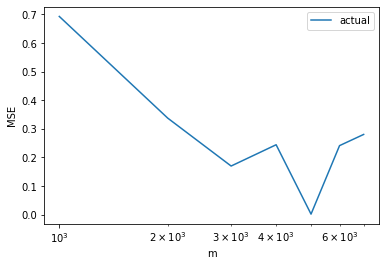

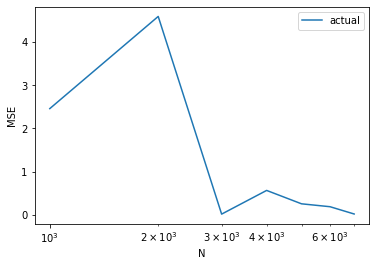

In [40]:
plot(N_variations, mse_m_fixed, "m")
plot(m_variations, mse_N_fixed, "N")